# Problem 2 – Logistic regression (35%)
Using the dataset ‘diabetes.csv’ included in the assignment, develop a logistic regression model to predict whether a patient has developed diabetes as a function of the remaining variables in the dataset.


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


#### 15% credit. Estimate the classification rate on validation data using k-fold cross validation.  Generate a plot of the average classification rate across folds for different values of k (2,3,..10).

In [2]:
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
print(diabetes.head())

(768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#split data into the features and class
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [4]:
k_fold = [2,3,4,5,6,7,8,9,10]
classification_rate_ary = []

for k in k_fold:
    classification_rate = []    
    model_list = []    
    for i in range(30):
        #do k fold cross validation using k...1/k will be the test set
        kf = KFold(n_splits=k, shuffle=True)
        #iterate through all the folds
        for i, (train_index, test_index) in enumerate(kf.split(diabetes)):
            #TODO: fix this, the iloc requires splitting of x and y
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            #fit the model
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)
            #predict
            y_pred = model.predict(X_test)

            classification_rate.append(np.mean(y_pred == y_test))

    classification_rate_ary.append(np.mean(classification_rate))
        

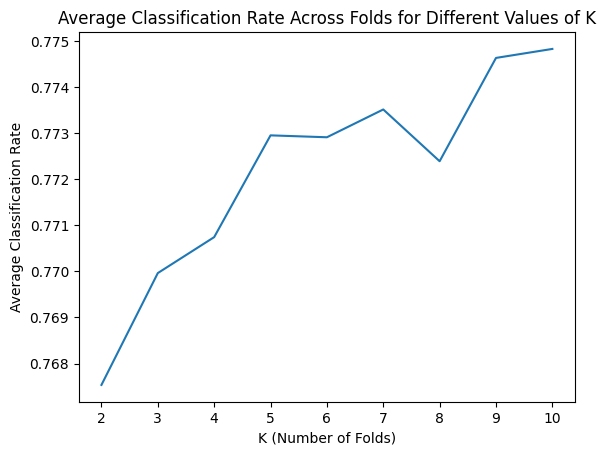

In [5]:
#generate plot of the average classification rate vs k
plt.plot(k_fold, classification_rate_ary)
plt.xlabel('K (Number of Folds)')
plt.ylabel('Average Classification Rate')
plt.title('Average Classification Rate Across Folds for Different Values of K')
plt.show()

#### 20% credit. Interpret the regression coefficients of the model. These coefficients will vary somewhat from fold to fold, but they should be somewhat consistent.  This will require you to develop some familiarity with the individual predictors and how they are related to diabetes.

In [6]:
#based on the plot above, the best k appears to be 9. Thus, I will use 9 folds to train/test the model, and pick the best model
best_cl = []
best_model = []
for i in range(30):
    #do k fold cross validation using k...1/k will be the test set
    kf = KFold(n_splits=9, shuffle=True)
    #iterate through all the folds
    cl_rate_all = []
    all_models = []
    for i, (train_index, test_index) in enumerate(kf.split(diabetes)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #fit the model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        
        #predict
        y_pred = model.predict(X_test)
        cl_rate_all.append(np.mean(y_pred == y_test))
        all_models.append(model)
        
    best_cl.append(np.max(cl_rate_all))
    best_model.append(all_models[np.argmax(cl_rate_all)])    
    
#by the end, we should have 30 best models, and 30 classification rates

In [7]:
#pick best model out of the 30 models, and show the regression coefficients
best_model_idx = np.argmax(best_cl)
best_model_found = best_model[best_model_idx]

Text(0.5, 1.0, 'Correlation matrix for Diabetes Features')

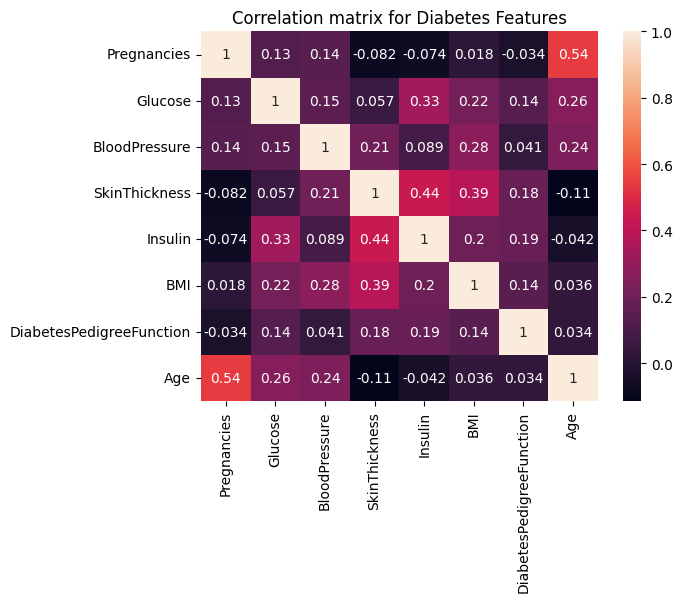

In [8]:
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation matrix for Diabetes Features")

In order to get regression results where I have a P-Value, I use statsmodels's logit (Logistic Regression) instead of that of sklearn. Its summary features will provide me the information that I require to determine sigificance of the predictors.
References: 
- https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
- https://dadataguy.medium.com/logistic-regression-using-statsmodels-a63e7944de76
- https://www.statology.org/interpret-prz-logistic-regression-output-r/#:~:text=The%20Pr(%3E%7Cz%7C),response%20variable%20in%20the%20model.

In [9]:
import statsmodels.api as sm

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit logistic regression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Add a constant term (array of 1s)
X_train = sm.add_constant(X_train)

# Fit 
stats_model = sm.Logit(y_train, X_train)
stats_result = stats_model.fit()

# Display summary
print(stats_result.summary())


Optimization terminated successfully.
         Current function value: 0.479823
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.2579
Time:                        23:57:39   Log-Likelihood:                -294.61
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 6.462e-40
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.8305      0.763    -10.262      0.000      -9.326

Overall, the implementation of Logistic regression from statmodels results in similar coefficients compared to that of sklearn.

In [10]:
coefs_table = pd.DataFrame(best_model_found.coef_, columns=X.columns, index=['Coefficients'])

coefs_table.transpose()


,Coefficients
Pregnancies,0.123187
Glucose,0.035087
BloodPressure,-0.012956
SkinThickness,0.003061
Insulin,-0.001469
BMI,0.077699
DiabetesPedigreeFunction,0.838436
Age,0.009655


accuracy:  0.7821138211382114


Text(0.5, 1.0, 'Confusion Matrix for Ground Truth vs Predicted Labels')

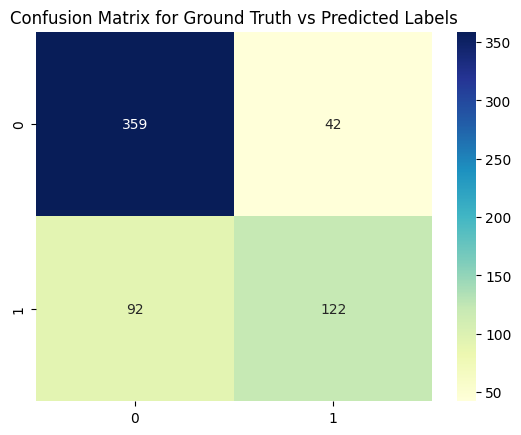

In [11]:
#generate confusion matrix for the best model
#when we do 80/20 split...we get the following
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=False)
y_pred = best_model_found.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g')
print("accuracy: ", np.trace(cm)/np.sum(cm))
plt.title("Confusion Matrix for Ground Truth vs Predicted Labels")

In [12]:
print('classification report')
print(classification_report(y_test, y_pred))

classification report
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       401
           1       0.74      0.57      0.65       214

    accuracy                           0.78       615
   macro avg       0.77      0.73      0.74       615
weighted avg       0.78      0.78      0.77       615

